# Ensemble Learning
## Bagging, Boosting, Stacking

In [ ]:
# The wisdom of the Crowd 

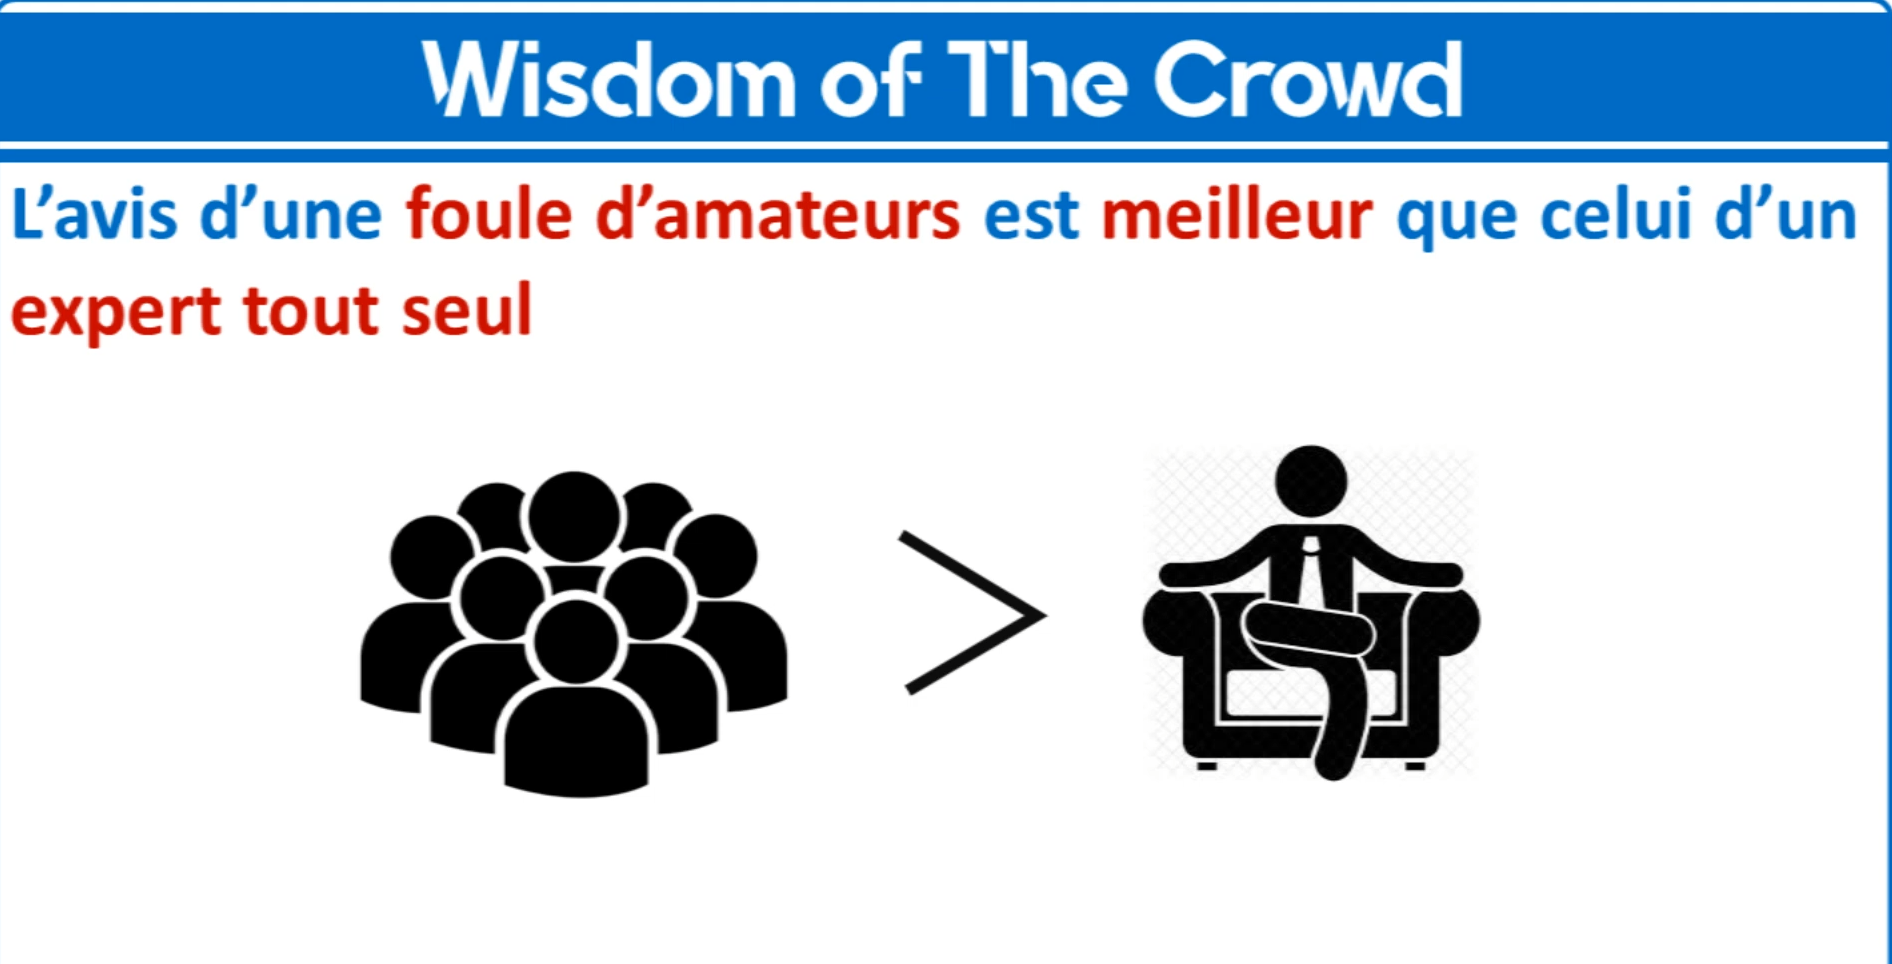

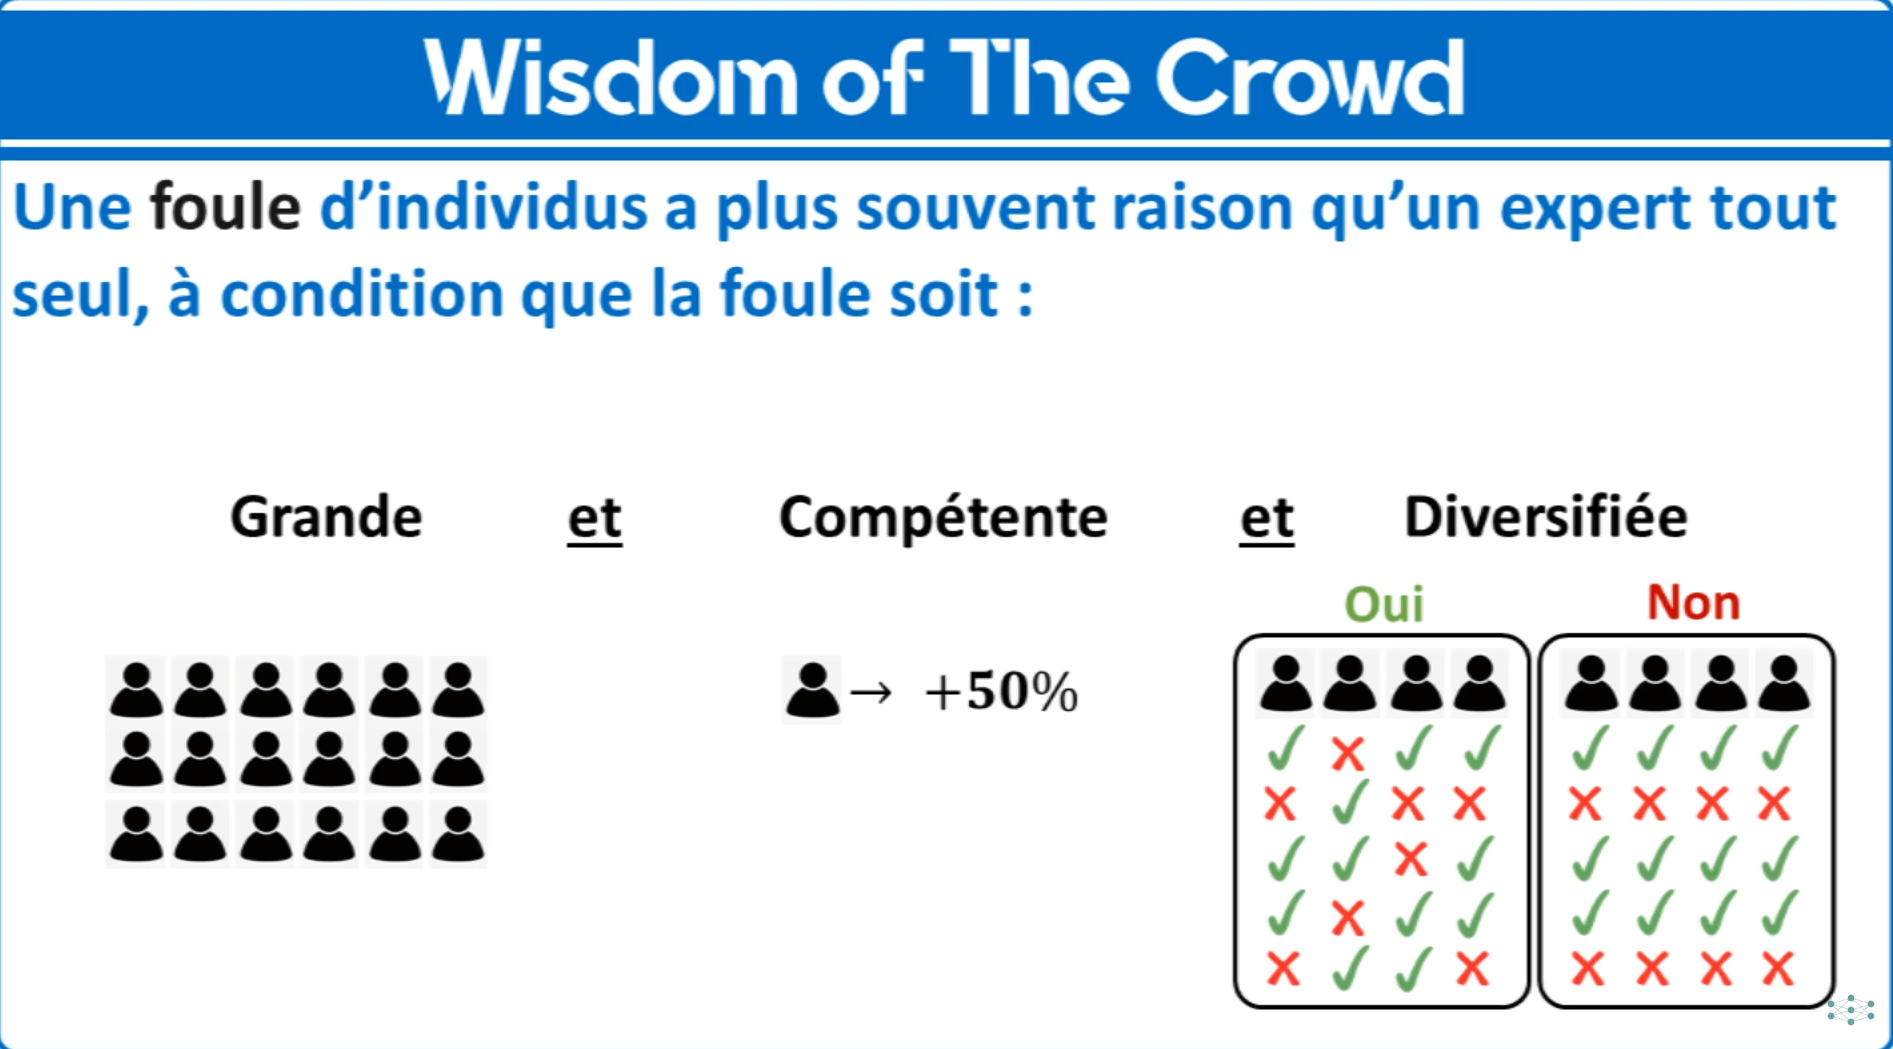

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

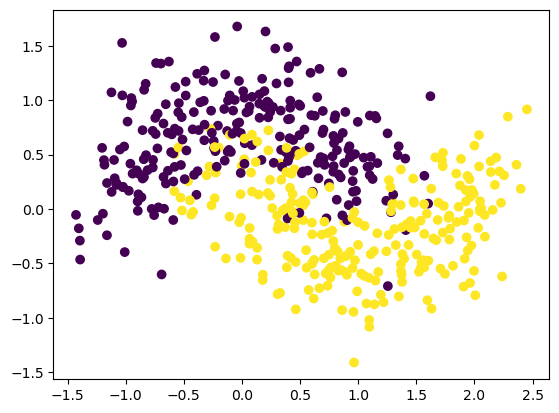

In [6]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Voting Classifier

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [23]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)
model_4 = VotingClassifier(estimators=[('sgd', model_1), ('tree', model_2), ('knn', model_3)], voting='hard')

In [24]:
for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


# Bagging

In [25]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [31]:
model = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8866666666666667

In [34]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

# Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [37]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

c:\Users\bilal\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.88

# Stacking

In [38]:
from sklearn.ensemble import StackingClassifier

In [42]:
model_4 = StackingClassifier(estimators=[('sgd', model_1), ('tree', model_2), ('knn', model_3)], final_estimator=KNeighborsClassifier())

model_4.fit(X_train, y_train)
model_4.score(X_test, y_test)

0.8666666666666667